In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('/kaggle/input/employee-dataset/Employee.csv')
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [3]:
print(df.isna().sum())
print(df.isnull().any())

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64
Education                    False
JoiningYear                  False
City                         False
PaymentTier                  False
Age                          False
Gender                       False
EverBenched                  False
ExperienceInCurrentDomain    False
LeaveOrNot                   False
dtype: bool


In [4]:
df.nunique()

Education                     3
JoiningYear                   7
City                          3
PaymentTier                   3
Age                          20
Gender                        2
EverBenched                   2
ExperienceInCurrentDomain     8
LeaveOrNot                    2
dtype: int64

In [5]:
df.duplicated().sum()


1889

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [7]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [8]:
df = df.drop_duplicates()
df.shape

(2764, 9)

In [9]:
df.Education.value_counts()

Education
Bachelors    1971
Masters       637
PHD           156
Name: count, dtype: int64

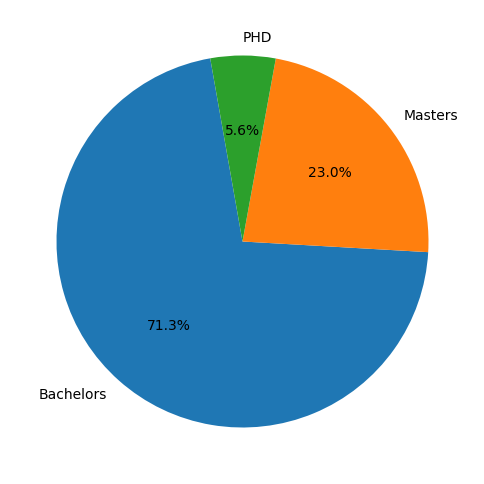

In [10]:
edu_count=df.Education.value_counts()
plt.figure(figsize=(6, 8))
plt.pie(edu_count, labels=edu_count.index, autopct='%1.1f%%', startangle=100)
plt.show()

In [11]:
df.JoiningYear.value_counts()

JoiningYear
2017    662
2015    464
2013    396
2014    385
2016    310
2012    308
2018    239
Name: count, dtype: int64

<Axes: xlabel='JoiningYear', ylabel='count'>

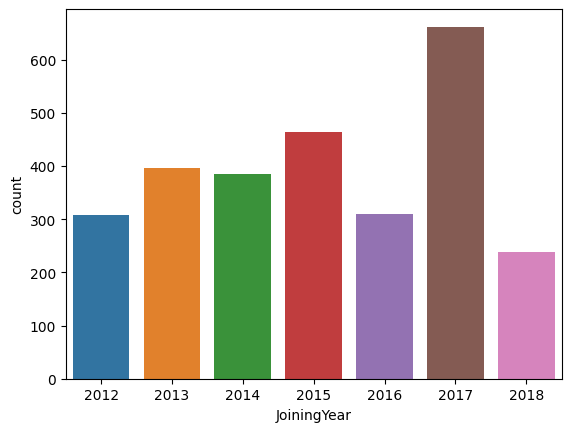

In [12]:
sns.countplot(data=df,x='JoiningYear')

In [13]:
pd.crosstab(df.JoiningYear,df.City,values=df.Age,aggfunc='median')

City,Bangalore,New Delhi,Pune
JoiningYear,,,
2012,31,28,29
2013,30,28,29
2014,31,28,30
2015,31,28,30
2016,31,28,29
2017,30,30,30
2018,31,29,29


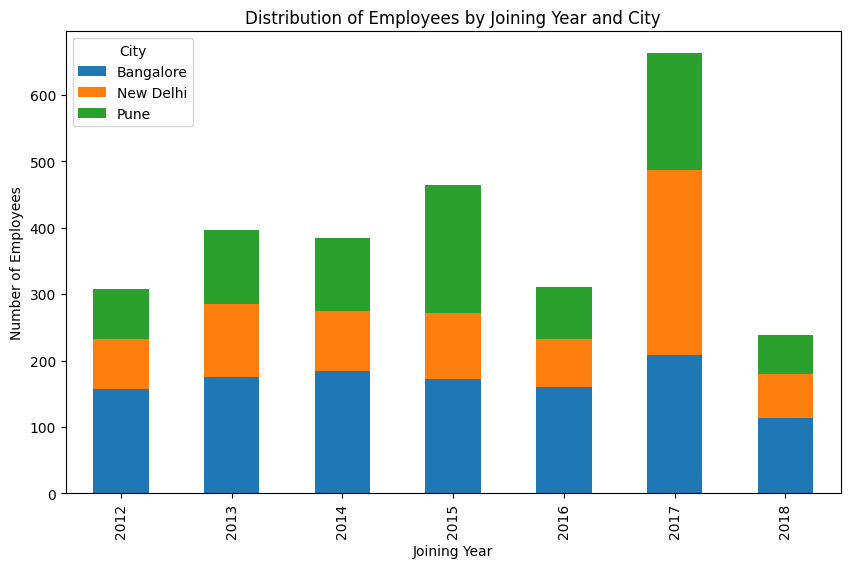

In [14]:
city_joinyear= df.groupby(['JoiningYear', 'City']).size().unstack()
ax = city_joinyear.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Joining Year')
plt.ylabel('Number of Employees')
plt.title('Distribution of Employees by Joining Year and City')

plt.legend(title='City', loc='upper left')
plt.show()

In [15]:
pd.crosstab(df.Gender,df.Education)

Education,Bachelors,Masters,PHD
Gender,,,
Female,894,278,63
Male,1077,359,93


In [16]:
pivot_table = pd.crosstab(df['Gender'], df['Education'], values=df['Age'], aggfunc=['median', 'min', 'max'])

pivot_table = pivot_table.reset_index()
pivot_table

Gender    median                   min                   max  \
Education         Bachelors Masters PHD Bachelors Masters PHD Bachelors   
0          Female        30      28  29        22      22  22        41   
1            Male        31      28  28        22      22  22        41   

                       
Education Masters PHD  
0              41  40  
1              41  41

<Axes: xlabel='Education', ylabel='count'>

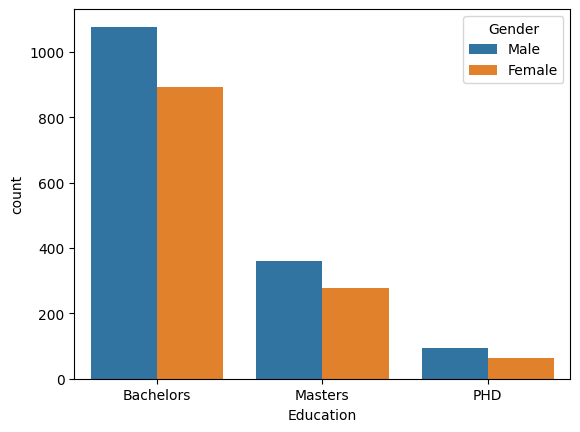

In [17]:
sns.countplot(data=df,x=df.Education,hue='Gender')

In [18]:
pd.crosstab(df.PaymentTier,df.Gender)


Gender,Female,Male
PaymentTier,,
1,115,103
2,367,203
3,753,1223


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


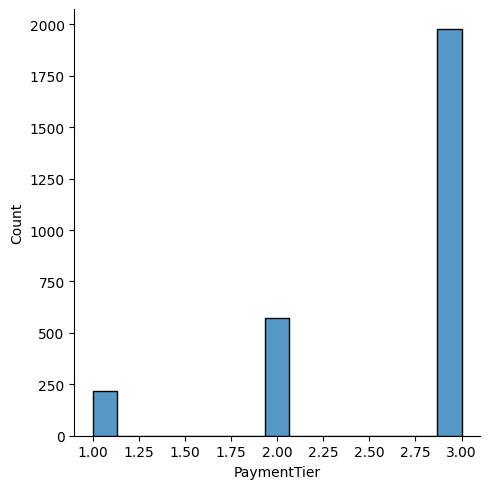

In [19]:
sns.displot(df['PaymentTier'])


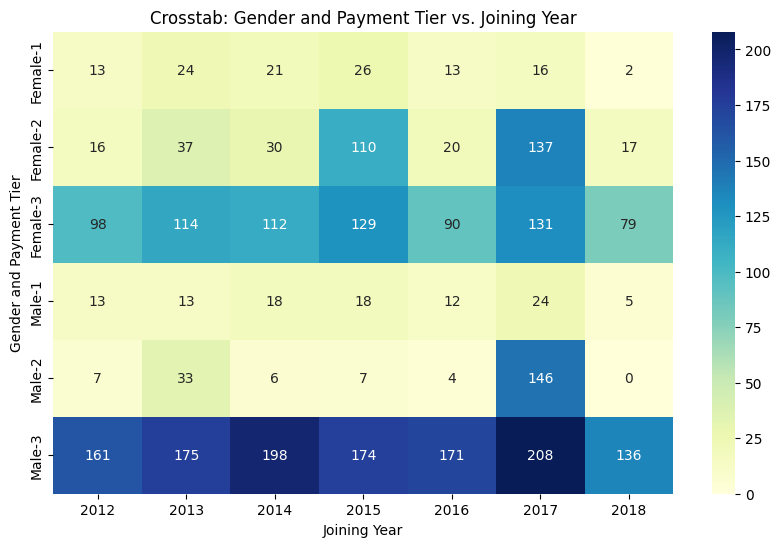

In [20]:
x=pd.crosstab([df.Gender,df.PaymentTier],df.JoiningYear)
plt.figure(figsize=(10, 6))
sns.heatmap(x, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Joining Year')
plt.ylabel('Gender and Payment Tier')
plt.title('Crosstab: Gender and Payment Tier vs. Joining Year')
plt.show()

In [21]:
df.EverBenched.value_counts()

EverBenched
No     2403
Yes     361
Name: count, dtype: int64

In [22]:
pd.crosstab(df.Gender,df.EverBenched)


EverBenched,No,Yes
Gender,,
Female,1098,137
Male,1305,224


<Axes: xlabel='EverBenched', ylabel='count'>

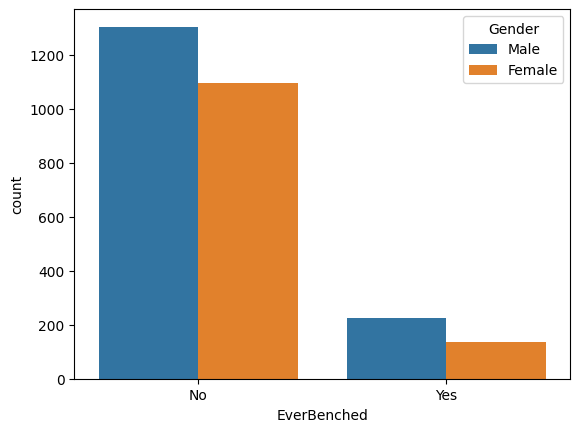

In [23]:
sns.countplot(data=df,x='EverBenched',hue='Gender')

<Figure size 1200x800 with 0 Axes>

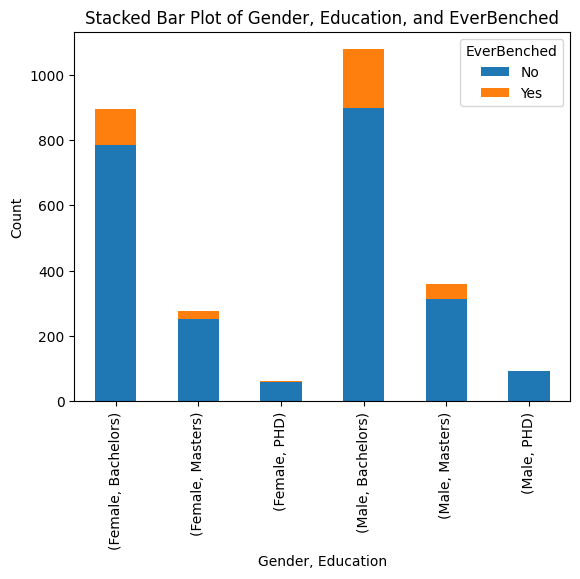

In [24]:
x = pd.crosstab([df['Gender'], df['Education']], df['EverBenched'])

plt.figure(figsize=(12, 8))

x.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of Gender, Education, and EverBenched')
plt.xlabel('Gender, Education')
plt.ylabel('Count')

# Show the plot
plt.show()

In [25]:
pd.crosstab(df.ExperienceInCurrentDomain,df.Gender)

Gender,Female,Male
ExperienceInCurrentDomain,,
0,119,168
1,192,241
2,302,379
3,202,249
4,204,221
5,210,260
6,2,6
7,4,5


<Axes: xlabel='ExperienceInCurrentDomain', ylabel='count'>

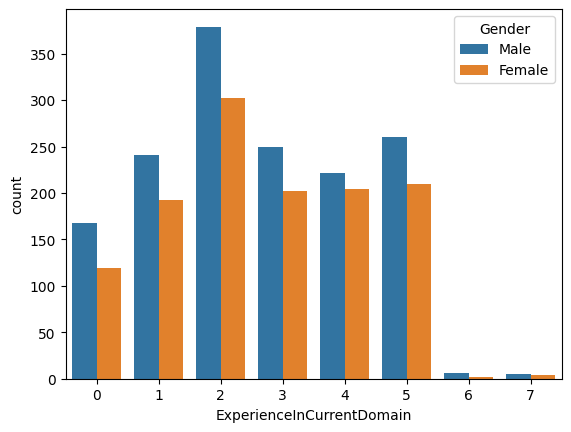

In [26]:
sns.countplot(data=df,x='ExperienceInCurrentDomain',hue='Gender')

In [27]:
pd.crosstab(df.ExperienceInCurrentDomain,df.PaymentTier)

PaymentTier,1,2,3
ExperienceInCurrentDomain,,,
0,23,56,208
1,35,75,323
2,48,167,466
3,37,92,322
4,32,91,302
5,41,87,342
6,1,1,6
7,1,1,7


In [28]:
df.ExperienceInCurrentDomain.value_counts()

ExperienceInCurrentDomain
2    681
5    470
3    451
1    433
4    425
0    287
7      9
6      8
Name: count, dtype: int64

<Axes: xlabel='ExperienceInCurrentDomain', ylabel='count'>

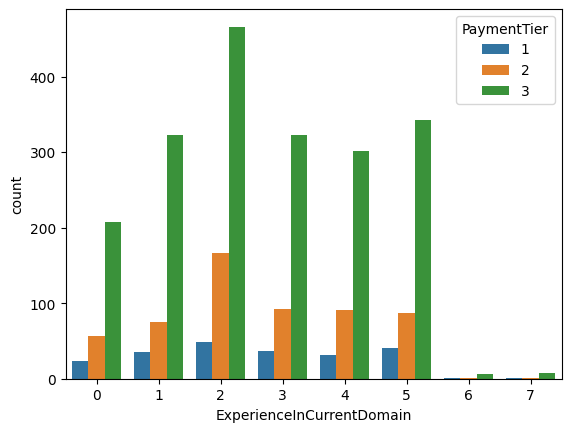

In [29]:
sns.countplot(data=df,x='ExperienceInCurrentDomain',hue='PaymentTier')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


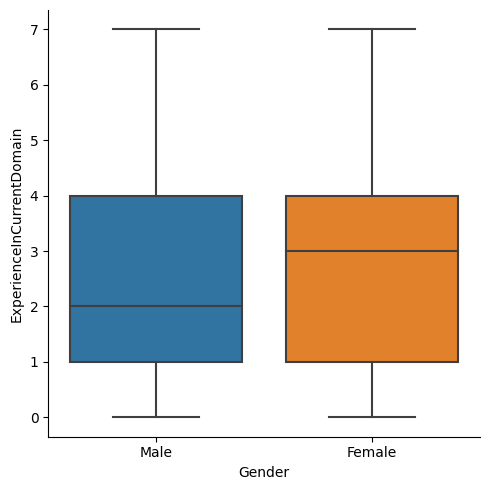

In [30]:
sns.catplot(data=df,x='Gender',y='ExperienceInCurrentDomain',kind='box')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


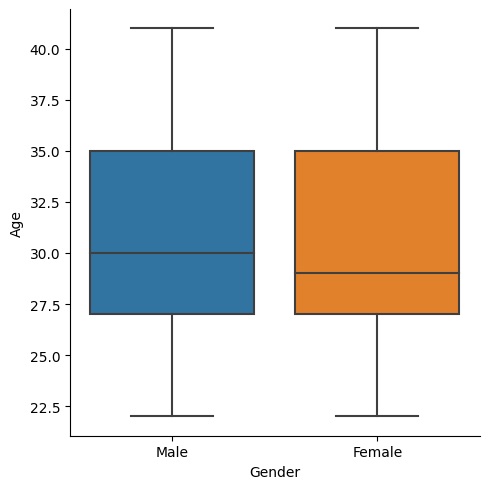

In [31]:
sns.catplot(data=df,x='Gender',y='Age',kind='box')

In [32]:
df.LeaveOrNot.value_counts()

LeaveOrNot
0    1676
1    1088
Name: count, dtype: int64

In [33]:
x=pd.crosstab([df.Gender,df.EverBenched],df.LeaveOrNot)
x

LeaveOrNot            0    1
Gender EverBenched          
Female No           558  540
       Yes           63   74
Male   No           916  389
       Yes          139   85

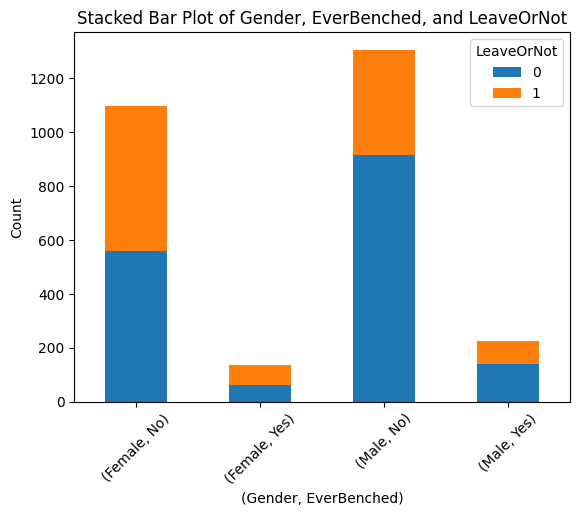

In [34]:
x.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of Gender, EverBenched, and LeaveOrNot')
plt.xlabel('(Gender, EverBenched)')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [36]:
le=LabelEncoder()
df["Education"]=le.fit_transform(df["Education"])
df["City"]=le.fit_transform(df["City"])
df["Gender"]=le.fit_transform(df["Gender"])
df["EverBenched"]=le.fit_transform(df["EverBenched"])
df.head()

/tmp/ipykernel_20/2417979659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Education"]=le.fit_transform(df["Education"])
/tmp/ipykernel_20/2417979659.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["City"]=le.fit_transform(df["City"])
/tmp/ipykernel_20/2417979659.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1


In [37]:
x=df.drop(columns='LeaveOrNot')
y=df.LeaveOrNot
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [38]:
model_svm = SVC(kernel = 'linear', random_state = 0)
model_svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [39]:
y_pred = model_svm.predict(X_test)

In [40]:
conf_matrix_svm = confusion_matrix(y_test, y_pred)
print(conf_matrix_svm)

[[338  73]
 [169 111]]


In [41]:
accuracy_svm = accuracy_score(y_test, y_pred)
print(accuracy_svm)

0.6497829232995659


In [42]:
classification_rep_svm = classification_report(y_test, y_pred)
print(classification_rep_svm)

              precision    recall  f1-score   support

           0       0.67      0.82      0.74       411
           1       0.60      0.40      0.48       280

    accuracy                           0.65       691
   macro avg       0.63      0.61      0.61       691
weighted avg       0.64      0.65      0.63       691

